In [56]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline

import requests
import random


In [57]:
# Endpoint for all objects
ids_url = "https://collectionapi.metmuseum.org/public/collection/v1/objects"

# Fetch the list of IDs
response = requests.get(ids_url)

# Confirm the request worked
print(response.status_code)

# Convert to JSON
data = response.json()

# Check the keys
print(data.keys()) 

object_ids = data['objectIDs']
print(object_ids[:10]) 
print(f"Total objects in Met collection: {data['total']}")


200
dict_keys(['total', 'objectIDs'])
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Total objects in Met collection: 498098


In [58]:
sample_ids = random.sample(object_ids, 50)

# Fetch details for each object
records = []
for oid in sample_ids:
    url = f"https://collectionapi.metmuseum.org/public/collection/v1/objects/{oid}"
    response = requests.get(url)
    if response.status_code == 200:
        records.append(response.json())

# Convert to DataFrame
df = pd.DataFrame(records)
print(df.columns)

# Save to CSV
df.to_csv("MetObjects_sample.csv", index=False)
df.head()

Index(['objectID', 'isHighlight', 'accessionNumber', 'accessionYear',
       'isPublicDomain', 'primaryImage', 'primaryImageSmall',
       'additionalImages', 'constituents', 'department', 'objectName', 'title',
       'culture', 'period', 'dynasty', 'reign', 'portfolio', 'artistRole',
       'artistPrefix', 'artistDisplayName', 'artistDisplayBio', 'artistSuffix',
       'artistAlphaSort', 'artistNationality', 'artistBeginDate',
       'artistEndDate', 'artistGender', 'artistWikidata_URL', 'artistULAN_URL',
       'objectDate', 'objectBeginDate', 'objectEndDate', 'medium',
       'dimensions', 'measurements', 'creditLine', 'geographyType', 'city',
       'state', 'county', 'country', 'region', 'subregion', 'locale', 'locus',
       'excavation', 'river', 'classification', 'rightsAndReproduction',
       'linkResource', 'metadataDate', 'repository', 'objectURL', 'tags',
       'objectWikidata_URL', 'isTimelineWork', 'GalleryNumber'],
      dtype='object')


,objectID,isHighlight,accessionNumber,accessionYear,isPublicDomain,primaryImage,primaryImageSmall,additionalImages,constituents,department,...,classification,rightsAndReproduction,linkResource,metadataDate,repository,objectURL,tags,objectWikidata_URL,isTimelineWork,GalleryNumber
0,224243,False,36.90.1151,1936,True,https://images.metmuseum.org/CRDImages/es/orig...,https://images.metmuseum.org/CRDImages/es/web-...,[],None,European Sculpture and Decorative Arts,...,Textiles-Woven,,,2020-03-02T21:50:01.377Z,"Metropolitan Museum of Art, New York, NY",https://www.metmuseum.org/art/collection/searc...,None,,False,
1,747759,False,1991.1073.41(16),1991,False,,,[],"[{'constituentID': 87325, 'role': 'Designer', ...",Drawings and Prints,...,Books,,,2025-03-06T04:54:30Z,"Metropolitan Museum of Art, New York, NY",https://www.metmuseum.org/art/collection/searc...,"[{'term': 'Butterflies', 'AAT_URL': 'http://vo...",,False,
2,446398,False,13.190.109,1913,True,https://images.metmuseum.org/CRDImages/is/orig...,https://images.metmuseum.org/CRDImages/is/web-...,[],None,Islamic Art,...,Ceramics,,,2025-01-30T04:54:21.21Z,"Metropolitan Museum of Art, New York, NY",https://www.metmuseum.org/art/collection/searc...,None,,False,
3,904443,False,21.91.218,1921,False,,,[],"[{'constituentID': 164550, 'role': 'Artist', '...",Drawings and Prints,...,Prints,,,2024-06-27T04:54:21.257Z,"Metropolitan Museum of Art, New York, NY",https://www.metmuseum.org/art/collection/searc...,None,,False,
4,405321,False,41.71.1.8(16),1941,False,,,[],"[{'constituentID': 162255, 'role': 'Artist', '...",Drawings and Prints,...,Prints,,,2023-06-28T04:56:22.387Z,"Metropolitan Museum of Art, New York, NY",https://www.metmuseum.org/art/collection/searc...,None,,False,


In [59]:
columns_to_use = [
    "objectID",
    "accessionYear",
    "objectBeginDate",
    "objectEndDate",
    "department",
    "culture",
    "artistDisplayName",
    "medium"
]

df = df[columns_to_use]

# Convert numeric columns
df["accessionYear"] = pd.to_numeric(df["accessionYear"], errors="coerce")
df["objectBeginDate"] = pd.to_numeric(df["objectBeginDate"], errors="coerce")
df["objectEndDate"] = pd.to_numeric(df["objectEndDate"], errors="coerce")

df["objectAge"] = df["objectEndDate"] - df["objectBeginDate"]
df["objectAge"] = df["objectAge"].fillna(0).astype(int)
df.head()


,objectID,accessionYear,objectBeginDate,objectEndDate,department,culture,artistDisplayName,medium,objectAge
0,224243,1936,1685,1699,European Sculpture and Decorative Arts,,,Silk and cotton,14
1,747759,1991,1920,1929,Drawings and Prints,,Emile-Allain Séguy,Lithograph and pochoir,9
2,446398,1913,1300,1499,Islamic Art,,,Earthenware; slip-painted under yellowish glaze,199
3,904443,1921,1768,1778,Drawings and Prints,,Jean Pillement,Etching,10
4,405321,1941,1800,1809,Drawings and Prints,,Giovanni Battista Piranesi,Etching; third state of four (Robison),9


accessionYear - min: 1889, max: 2018, mean: 1956.41, median: 1955.0


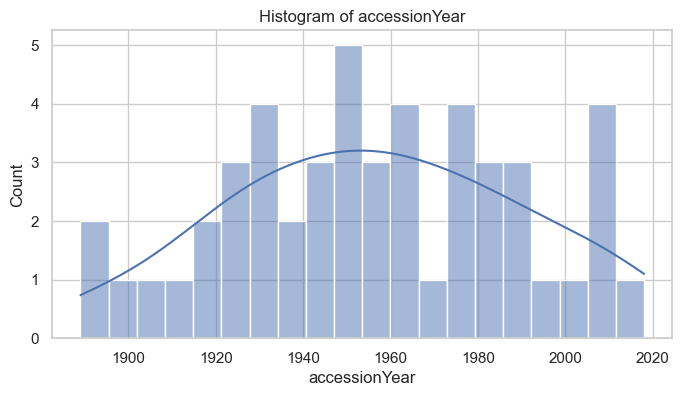

objectBeginDate - min: -2300, max: 1975, mean: 1298.92, median: 1749.0


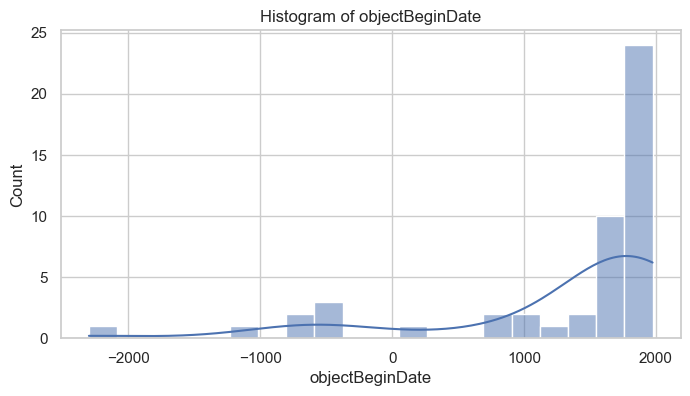

objectEndDate - min: -2000, max: 2000, mean: 1378.90, median: 1800.0


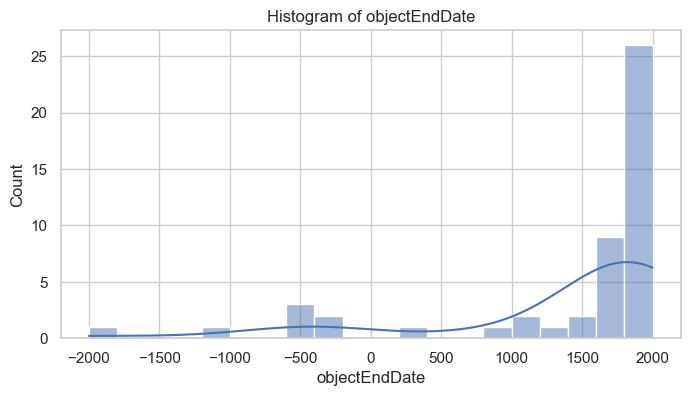

objectAge - min: 0, max: 500, mean: 79.98, median: 43.0


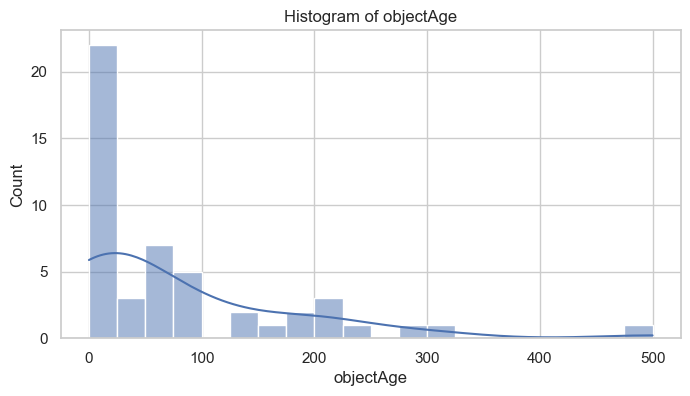

In [60]:
# 1D Histograms for numeric columns

numeric_cols = ["accessionYear", "objectBeginDate", "objectEndDate", "objectAge"]

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col].dropna(), kde=True, bins=20)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    print(f"{col} - min: {df[col].min()}, max: {df[col].max()}, mean: {df[col].mean():.2f}, median: {df[col].median()}")
    plt.show()


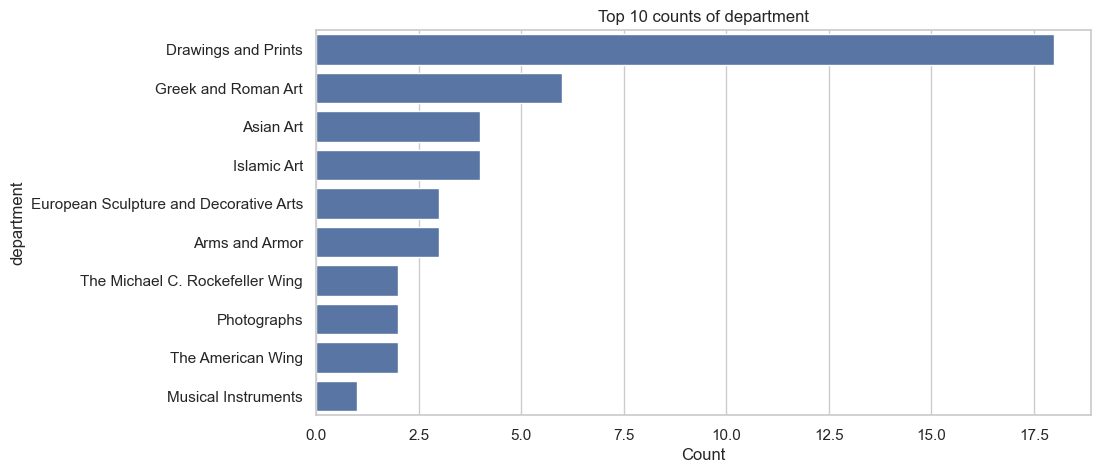

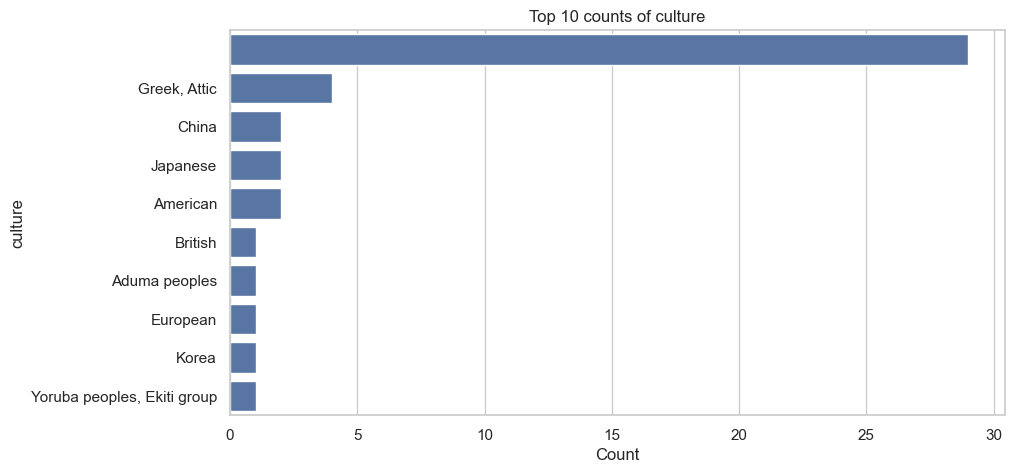

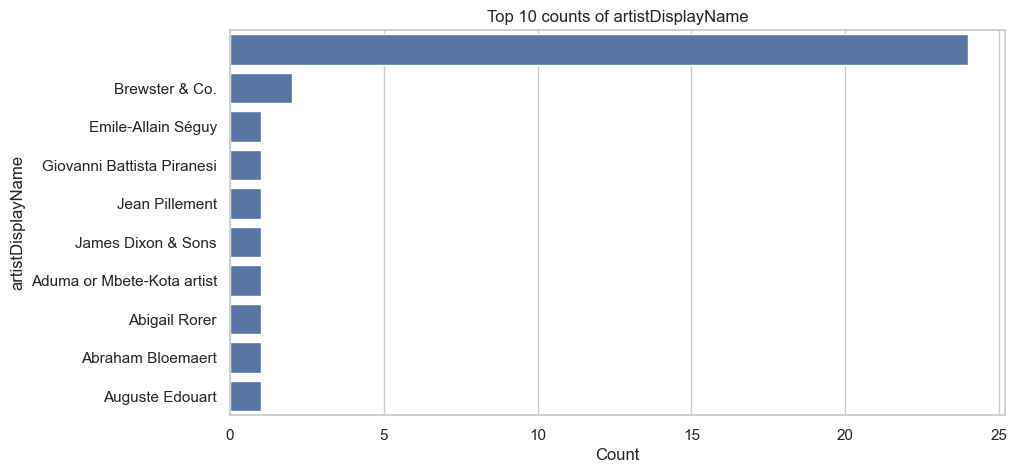

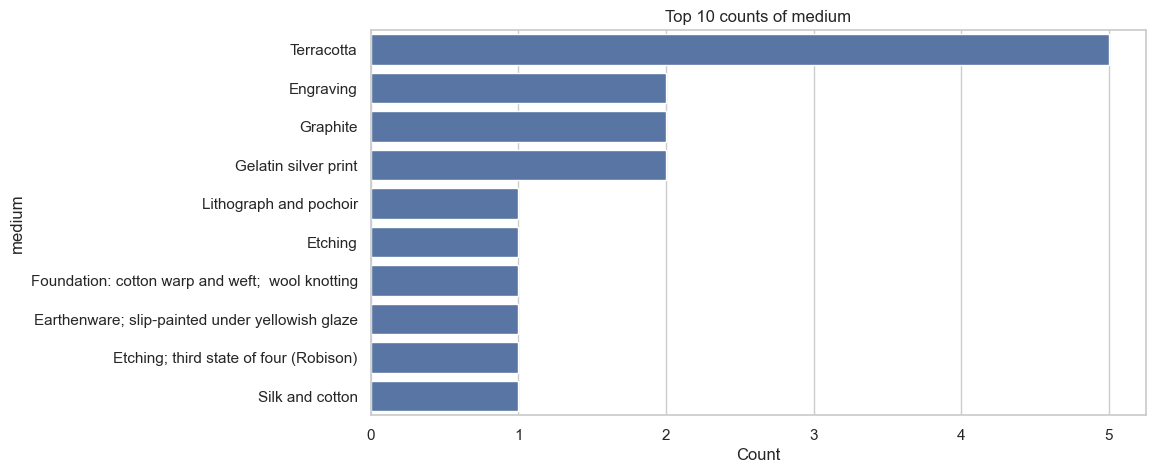

In [61]:
# Bar charts for categorical columns

categorical_cols = ["department", "culture", "artistDisplayName", "medium"]

for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index[:10])  
    plt.title(f"Top 10 counts of {col}")
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.show()


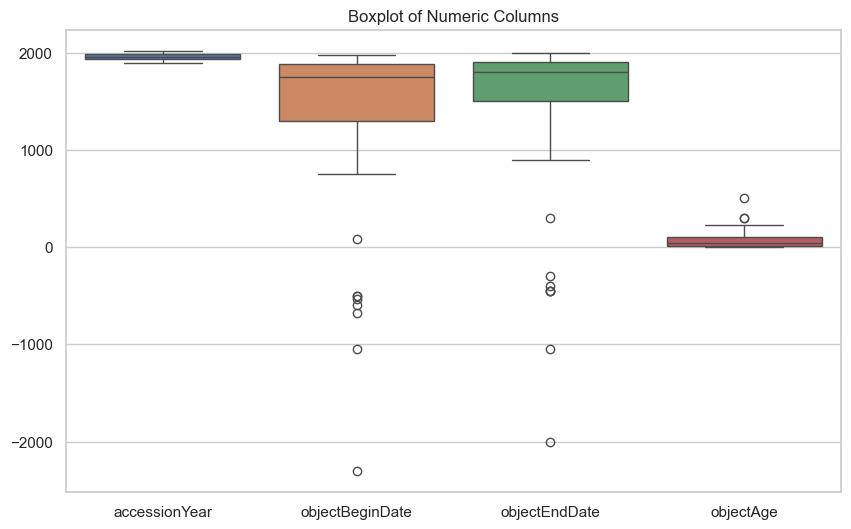

In [62]:
# Boxplots

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numeric_cols])
plt.title("Boxplot of Numeric Columns")
plt.show()


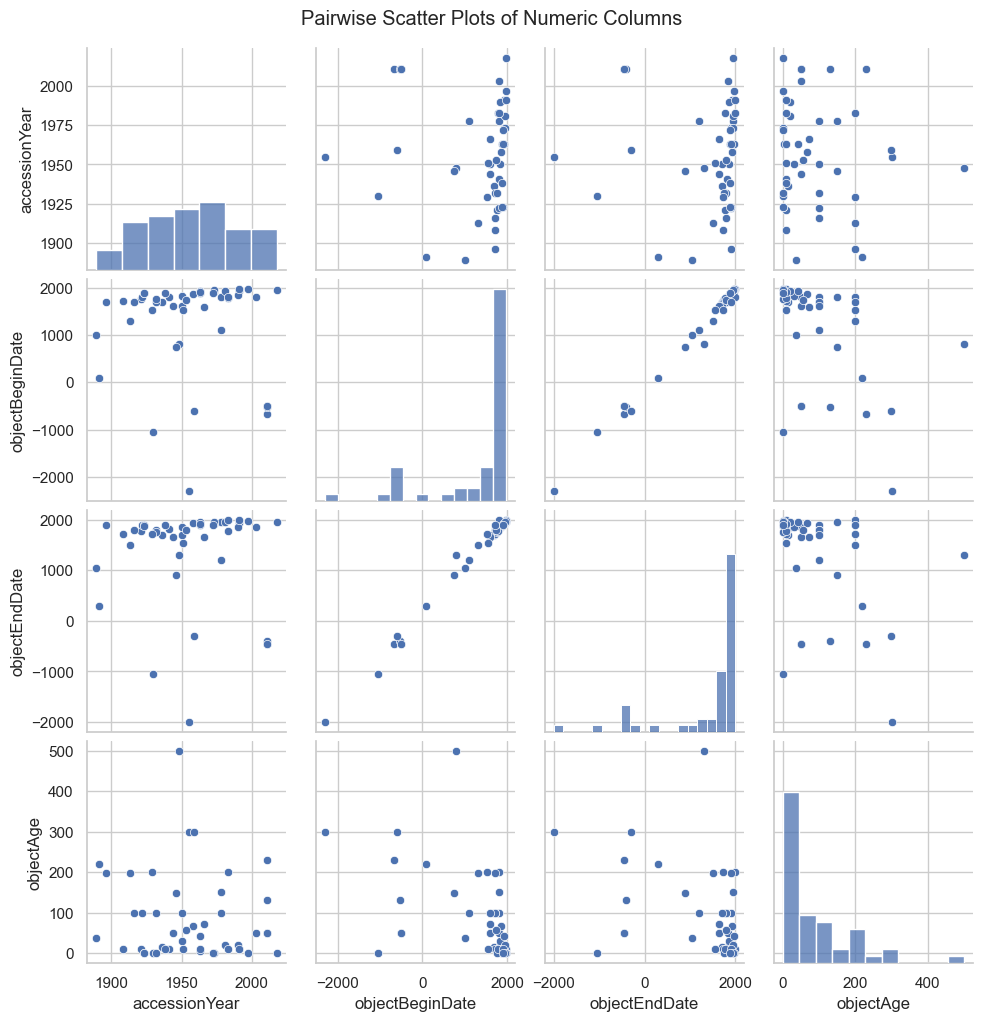

In [63]:
#Pairwise scatter plots

sns.pairplot(df[numeric_cols].dropna())
plt.suptitle("Pairwise Scatter Plots of Numeric Columns", y=1.02)
plt.show()


culture                                     Aduma peoples  American  British  \
department                                                                     
Ancient Near Eastern Art                 0              0         0        0   
Arms and Armor                           0              0         0        0   
Asian Art                                0              0         0        0   
Costume Institute                        0              0         0        0   
Drawings and Prints                     18              0         0        0   
Egyptian Art                             1              0         0        0   
European Sculpture and Decorative Arts   3              0         0        0   
Greek and Roman Art                      0              0         0        0   
Islamic Art                              4              0         0        0   
Modern and Contemporary Art              1              0         0        0   
Musical Instruments                     

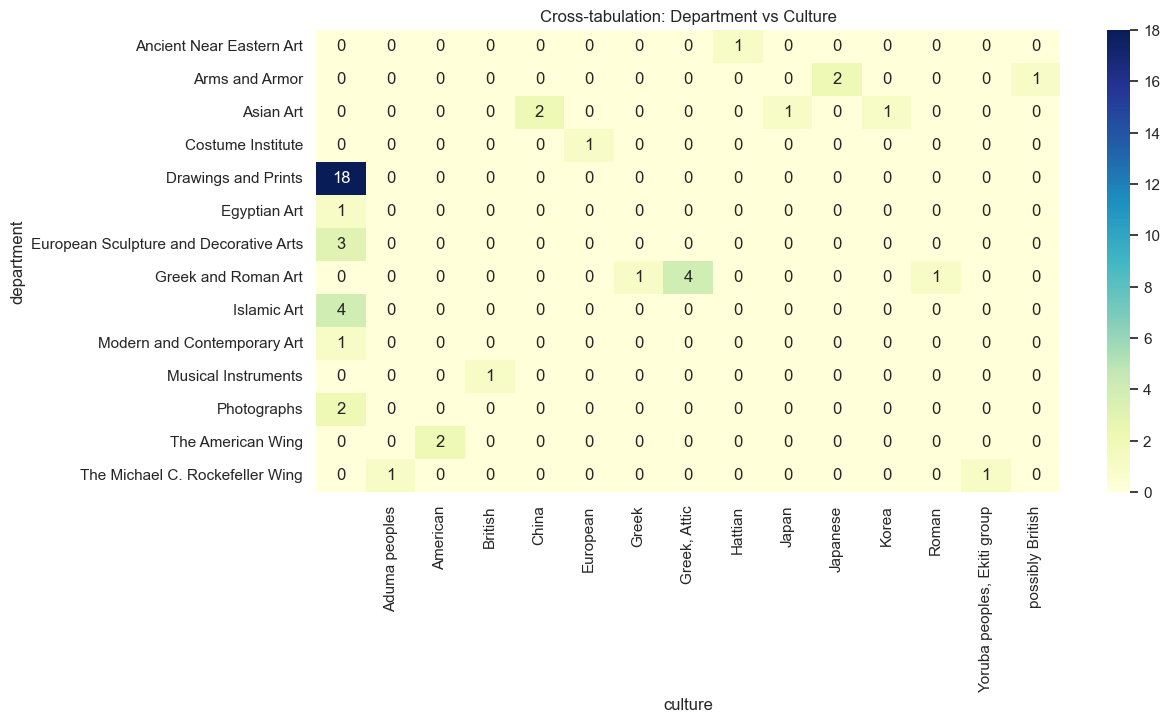

In [64]:
#Cross-tabulation 

cross_tab = pd.crosstab(df['department'], df['culture'])
print(cross_tab)

plt.figure(figsize=(12, 6))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Cross-tabulation: Department vs Culture")
plt.show()


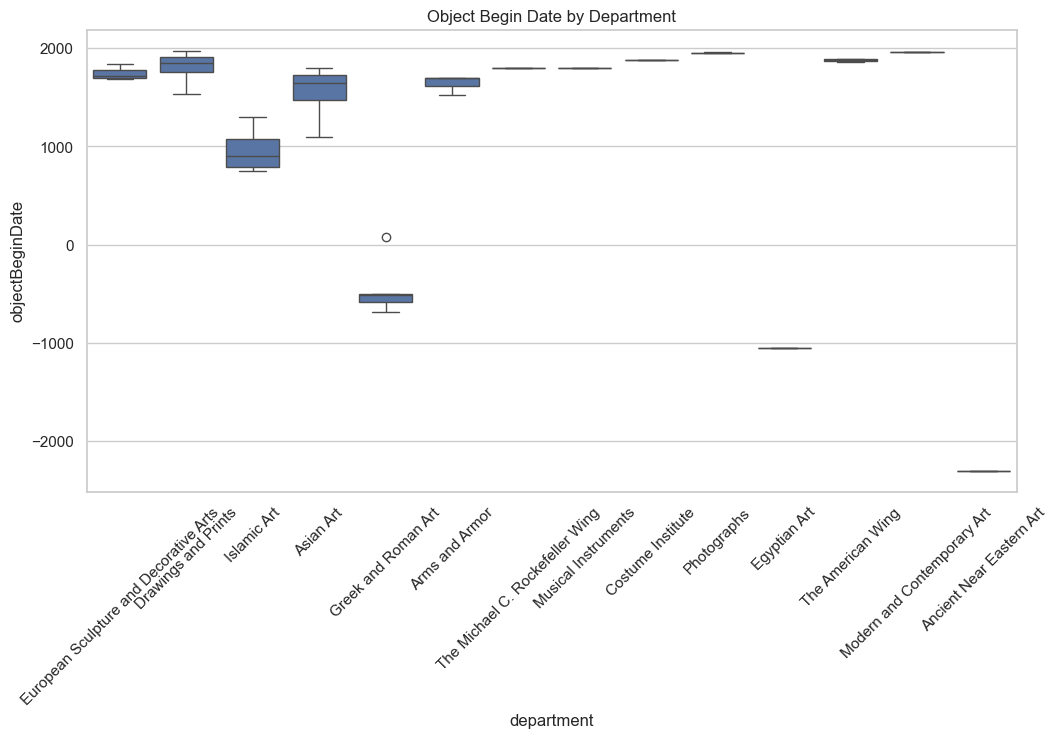

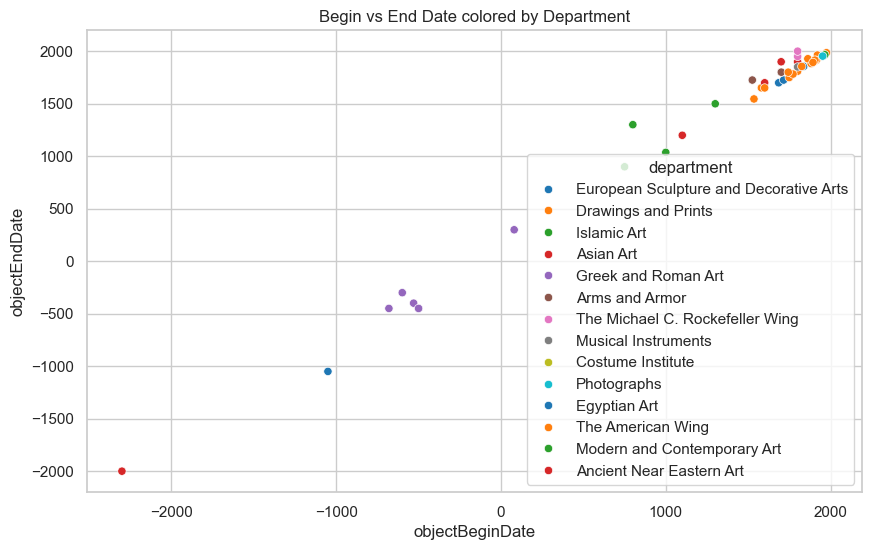

In [65]:
# Boxplots to show numeric values across categories

plt.figure(figsize=(12, 6))
sns.boxplot(x='department', y='objectBeginDate', data=df)
plt.xticks(rotation=45)
plt.title("Object Begin Date by Department")
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='objectBeginDate', y='objectEndDate', hue='department', data=df, palette="tab10")
plt.title("Begin vs End Date colored by Department")
plt.show()
